In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns # type: ignore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

# early stopping is used to reduce overfittinb





In [7]:

X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

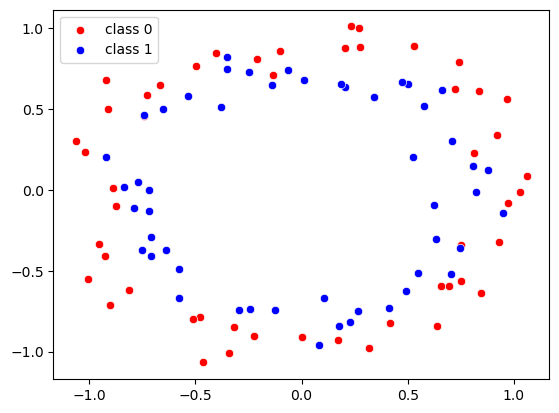

In [13]:
sns.scatterplot(x=X[y==0, 0], y=X[y==0, 1], color='red', label='class 0')
sns.scatterplot(x=X[y==1, 0], y=X[y==1, 1], color='blue', label='class 1')
plt.show()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [19]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500) # verbose=0 to disable output

Epoch 1/3500
3/3 [==============================] - 1s 143ms/step - loss: 0.6942 - accuracy: 0.4875 - val_loss: 0.6843 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.6920 - accuracy: 0.4875 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6902 - accuracy: 0.4875 - val_loss: 0.6894 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6892 - accuracy: 0.4875 - val_loss: 0.6934 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6878 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.6000
Epoch 6/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6868 - accuracy: 0.5500 - val_loss: 0.6997 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6856 - accuracy: 0.5875 - val_loss: 0.7013 - val_accuracy: 0.4000
Epoch 8/3500

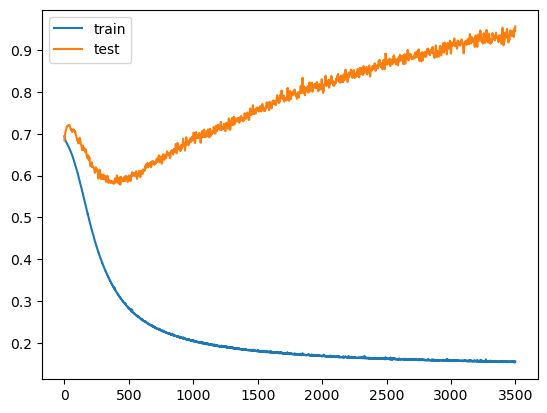

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:
model2 = Sequential()

model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=200,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback) # verbose=0 to disable output

Epoch 1/3500
3/3 [==============================] - 1s 124ms/step - loss: 0.6941 - accuracy: 0.5375 - val_loss: 0.7065 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.5500 - val_loss: 0.7093 - val_accuracy: 0.3000
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6904 - accuracy: 0.5625 - val_loss: 0.7110 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6895 - accuracy: 0.5250 - val_loss: 0.7117 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7131 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6873 - accuracy: 0.5375 - val_loss: 0.7129 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6862 - accuracy: 0.5375 - val_loss: 0.7127 - val_accuracy: 0.4500
Epoch 8/3500

Callback Not Triggering Early Stopping:

Training Data: Ensure that the val_loss is actually improving or fluctuating enough to meet the conditions set by the EarlyStopping callback.
Patience Parameter: The patience parameter is set to 20, meaning the training will continue for 20 epochs without improvement before stopping. This might be too high if your validation loss doesn't improve frequently.
min_delta Parameter: The min_delta is set to 0.0001, meaning the validation loss must improve by at least this amount to be considered an improvement. This might be too stringent.


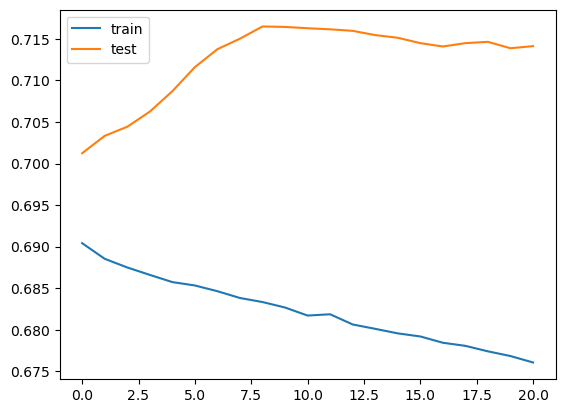

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()